<a href="https://colab.research.google.com/github/PRUTHVIRAJ-H/UIDAI-DATATHON-/blob/main/BIOMETRIC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task
Analyze the provided Adhaar biometric data from the Excel files within the uploaded ZIP archive and generate a comprehensive report covering data processing, cleaning, feature engineering, and a full spectrum of descriptive and inferential statistical analyses, highlighting key discoveries and insights.

## Provide File Upload Button and Load Excel Files

### Subtask:
Load the Excel files from the uploaded ZIP archive into pandas DataFrames, storing them in a dictionary, and display the first few rows and information for each.


**Reasoning**:
The subtask requires loading Excel files from a ZIP archive, storing them as pandas DataFrames in a dictionary, and then displaying the head and info for each. This code block will perform all these steps by importing necessary libraries, extracting the files, and iterating through them to process.



In [21]:
import zipfile
import io
import pandas as pd
import os

# Access the content of the uploaded ZIP file
zip_content = uploaded[filename]

# Open the ZIP archive from the byte content
with zipfile.ZipFile(io.BytesIO(zip_content), 'r') as zip_file:
    # Iterate through each file within the ZIP archive
    for file_name in zip_file.namelist():
        # Process only Excel files
        if file_name.endswith('.xlsx') or file_name.endswith('.xls'):
            print(f"Processing file: {file_name}")
            # Read the file's content
            excel_content = zip_file.read(file_name)
            # Use io.BytesIO to treat the content as a file-like object
            excel_file_like = io.BytesIO(excel_content)

            # Read the Excel file into a pandas DataFrame
            df = pd.read_excel(excel_file_like)

            # Store the DataFrame in the dataframes dictionary
            df_name = os.path.splitext(os.path.basename(file_name))[0]
            dataframes[df_name] = df

            print(f"\nFirst 5 rows of {df_name}:")
            print(df.head())
            print(f"\nInformation for {df_name}:")
            df.info()
            print("\n" + "-"*30 + "\n")

print("All Excel files processed and loaded into 'dataframes' dictionary.")

All Excel files processed and loaded into 'dataframes' dictionary.


**Reasoning**:
The previous code block was designed to process only Excel files (`.xlsx` or `.xls`), but the `file_name` in the kernel state indicates that the file within the ZIP archive is actually a CSV file (`.csv`). To correctly load the provided data and fulfill the subtask's objective of processing the biometric data, the code needs to be updated to handle CSV files as well, using `pd.read_csv` for them.



In [22]:
import zipfile
import io
import pandas as pd
import os

# Access the content of the uploaded ZIP file
zip_content = uploaded[filename]

# Initialize an empty dictionary to store DataFrames (if not already initialized)
if 'dataframes' not in locals() or dataframes is None:
    dataframes = {}

# Open the ZIP archive from the byte content
with zipfile.ZipFile(io.BytesIO(zip_content), 'r') as zip_file:
    # Iterate through each file within the ZIP archive
    for file_name in zip_file.namelist():
        df = None
        print(f"Processing file: {file_name}")

        # Process Excel files
        if file_name.endswith('.xlsx') or file_name.endswith('.xls'):
            excel_content = zip_file.read(file_name)
            excel_file_like = io.BytesIO(excel_content)
            df = pd.read_excel(excel_file_like)

        # Process CSV files
        elif file_name.endswith('.csv'):
            csv_content = zip_file.read(file_name)
            csv_file_like = io.BytesIO(csv_content)
            df = pd.read_csv(csv_file_like)

        if df is not None:
            # Store the DataFrame in the dataframes dictionary
            df_name = os.path.splitext(os.path.basename(file_name))[0]
            dataframes[df_name] = df

            print(f"\nFirst 5 rows of {df_name}:")
            print(df.head())
            print(f"\nInformation for {df_name}:")
            df.info()
            print("\n" + "-"*30 + "\n")
        else:
            print(f"Skipping unsupported file type: {file_name}")

print("All supported files processed and loaded into 'dataframes' dictionary.")

Processing file: api_data_aadhar_biometric/
Skipping unsupported file type: api_data_aadhar_biometric/
Processing file: api_data_aadhar_biometric/api_data_aadhar_biometric_0_500000.csv

First 5 rows of api_data_aadhar_biometric_0_500000:
         date              state      district  pincode  bio_age_5_17  \
0  01-03-2025            Haryana  Mahendragarh   123029           280   
1  01-03-2025              Bihar     Madhepura   852121           144   
2  01-03-2025  Jammu and Kashmir         Punch   185101           643   
3  01-03-2025              Bihar       Bhojpur   802158           256   
4  01-03-2025         Tamil Nadu       Madurai   625514           271   

   bio_age_17_  
0          577  
1          369  
2         1091  
3          980  
4          815  

Information for api_data_aadhar_biometric_0_500000:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype 
---  ------    

## Combine DataFrames into a Single Dataset

### Subtask:
Concatenate the three individual DataFrames (extracted from the uploaded ZIP) into one master DataFrame. Verify the combination by displaying the head, shape, and basic descriptive statistics of the combined dataset.


**Reasoning**:
The subtask requires concatenating all DataFrames stored in the 'dataframes' dictionary into a single DataFrame, and then displaying its head, shape, and descriptive statistics. This code block will perform these operations using `pd.concat` and standard pandas methods.



In [23]:
import pandas as pd

# Ensure dataframes dictionary is available
if 'dataframes' in locals() and isinstance(dataframes, dict):
    # Concatenate all DataFrames in the dictionary into a single DataFrame
    combined_df = pd.concat(dataframes.values(), ignore_index=True)

    print("\nFirst 5 rows of the combined DataFrame:")
    print(combined_df.head())

    print("\nShape of the combined DataFrame:")
    print(combined_df.shape)

    print("\nDescriptive statistics for the combined DataFrame:")
    print(combined_df.describe(include='all'))
else:
    print("The 'dataframes' dictionary was not found or is empty. Please ensure data is loaded first.")


First 5 rows of the combined DataFrame:
         date              state      district  pincode  bio_age_5_17  \
0  01-03-2025            Haryana  Mahendragarh   123029           280   
1  01-03-2025              Bihar     Madhepura   852121           144   
2  01-03-2025  Jammu and Kashmir         Punch   185101           643   
3  01-03-2025              Bihar       Bhojpur   802158           256   
4  01-03-2025         Tamil Nadu       Madurai   625514           271   

   bio_age_17_  
0          577  
1          369  
2         1091  
3          980  
4          815  

Shape of the combined DataFrame:
(1861108, 6)

Descriptive statistics for the combined DataFrame:
              date       state district       pincode  bio_age_5_17  \
count      1861108     1861108  1861108  1.861108e+06  1.861108e+06   
unique          89          57      974           NaN           NaN   
top     25-12-2025  Tamil Nadu     Pune           NaN           NaN   
freq         24646      184568    1

## Comprehensive Data Cleaning and Initial Exploration

### Subtask:
Conduct an in-depth initial exploration of the combined dataset. This includes identifying data types, checking for inconsistencies, standardizing data formats, removing duplicate entries, and handling any obvious data entry errors or outliers that can be identified automatically. Provide a summary of changes made during this step.


**Reasoning**:
To begin the data cleaning and exploration, I need to get an overview of the combined DataFrame's structure, including data types and non-null counts. This will help identify initial areas for cleaning, such as the 'date' column, which is currently an object type.



In [24]:
print("Initial information about combined_df:")
combined_df.info()


Initial information about combined_df:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1861108 entries, 0 to 1861107
Data columns (total 6 columns):
 #   Column        Dtype 
---  ------        ----- 
 0   date          object
 1   state         object
 2   district      object
 3   pincode       int64 
 4   bio_age_5_17  int64 
 5   bio_age_17_   int64 
dtypes: int64(3), object(3)
memory usage: 85.2+ MB


**Reasoning**:
I will proceed with the data cleaning steps as outlined: converting the 'date' column to datetime, checking and removing duplicates, standardizing text columns, and then providing a summary of these actions along with the updated DataFrame information.



In [25]:
print("Current information about combined_df before cleaning:")
combined_df.info()
print("\n" + "-"*30 + "\n")

initial_shape = combined_df.shape[0]

# 2. Convert 'date' column to datetime
# It's important to use dayfirst=True because the format is 'DD-MM-YYYY'
combined_df['date'] = pd.to_datetime(combined_df['date'], errors='coerce', dayfirst=True)
print("Converted 'date' column to datetime. Invalid dates coerced to NaT.")

# 3. Check for duplicate rows
duplicates_before = combined_df.duplicated().sum()
print(f"\nNumber of duplicate rows found: {duplicates_before}")

# 4. Remove duplicate rows and reset index
if duplicates_before > 0:
    combined_df.drop_duplicates(inplace=True)
    combined_df.reset_index(drop=True, inplace=True)
    print("Duplicate rows removed and index reset.")
else:
    print("No duplicate rows to remove.")

duplicates_removed = duplicates_before

# 5. Standardize 'state' and 'district' columns to title case
# Check if 'state' and 'district' columns exist and are of object (string) type
if 'state' in combined_df.columns and combined_df['state'].dtype == 'object':
    combined_df['state'] = combined_df['state'].str.title()
    print("Standardized 'state' column to title case.")
if 'district' in combined_df.columns and combined_df['district'].dtype == 'object':
    combined_df['district'] = combined_df['district'].str.title()
    print("Standardized 'district' column to title case.")

final_shape = combined_df.shape[0]
rows_removed_total = initial_shape - final_shape

# 6. Display new shape, info, and summary of changes
print("\n" + "-"*30 + "\n")
print("Summary of cleaning changes:")
print(f"- 'date' column converted to datetime format.")
print(f"- {duplicates_removed} duplicate rows removed.")
print(f"- 'state' and 'district' columns standardized to title case.")
print(f"- Total rows remaining after cleaning: {final_shape}")

print("\nNew shape of combined DataFrame:")
print(combined_df.shape)

print("\nInformation about combined_df after cleaning:")
combined_df.info()

Current information about combined_df before cleaning:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1861108 entries, 0 to 1861107
Data columns (total 6 columns):
 #   Column        Dtype 
---  ------        ----- 
 0   date          object
 1   state         object
 2   district      object
 3   pincode       int64 
 4   bio_age_5_17  int64 
 5   bio_age_17_   int64 
dtypes: int64(3), object(3)
memory usage: 85.2+ MB

------------------------------

Converted 'date' column to datetime. Invalid dates coerced to NaT.

Number of duplicate rows found: 94896
Duplicate rows removed and index reset.
Standardized 'state' column to title case.
Standardized 'district' column to title case.

------------------------------

Summary of cleaning changes:
- 'date' column converted to datetime format.
- 94896 duplicate rows removed.
- 'state' and 'district' columns standardized to title case.
- Total rows remaining after cleaning: 1766212

New shape of combined DataFrame:
(1766212, 6)

Informatio

## Advanced Missing Value Imputation

### Subtask:
Systematically identify all columns with missing values. Implement advanced imputation techniques, such as statistical methods (mean, median, mode, regression imputation) or machine learning-based imputation (e.g., KNN imputer), choosing the most appropriate method based on the nature of each column and the Adhaar biometric data. Document the missing value percentage before and after imputation for each column.


**Reasoning**:
The first step is to systematically identify all columns with missing values, including checking for `NaT` values in the 'date' column as explicitly instructed. This will determine if any imputation is required.



In [26]:
print("Checking for missing values across all columns:")
missing_values = combined_df.isnull().sum()

# Also explicitly check for NaT in the 'date' column, though .isnull() typically handles it for datetime types
# For objects, isnull() checks for None and np.nan. For datetime, it checks for NaT.
# So combined_df.isnull().sum() on datetime columns is sufficient.

missing_values_percentage = (missing_values / len(combined_df)) * 100

print("Missing values before imputation:")
print(missing_values[missing_values > 0])
print("\nPercentage of missing values before imputation:")
print(missing_values_percentage[missing_values_percentage > 0])

if missing_values.sum() == 0:
    print("\nNo missing values found in the dataset. No imputation is required.")
else:
    print("\nMissing values detected. Proceeding with imputation strategy selection and application.")
    # In this specific case, it appears there are no missing values based on the previous `df.info()`.
    # However, if there were, the next steps would involve selecting and applying imputation methods.
    # For instance:
    # if 'date' in combined_df.columns and combined_df['date'].isnull().any():
    #     # Example: drop rows with NaT if few
    #     combined_df.dropna(subset=['date'], inplace=True)
    #     print("Dropped rows with missing 'date' values.")
    # if 'numerical_column' in combined_df.columns and combined_df['numerical_column'].isnull().any():
    #     combined_df['numerical_column'].fillna(combined_df['numerical_column'].median(), inplace=True)
    #     print("Imputed 'numerical_column' with median.")
    # if 'categorical_column' in combined_df.columns and combined_df['categorical_column'].isnull().any():
    #     combined_df['categorical_column'].fillna(combined_df['categorical_column'].mode()[0], inplace=True)
    #     print("Imputed 'categorical_column' with mode.")

    # Re-check missing values after (hypothetical) imputation
    # print("\nMissing values after imputation:")
    # missing_values_after = combined_df.isnull().sum()
    # missing_values_percentage_after = (missing_values_after / len(combined_df)) * 100
    # print(missing_values_after[missing_values_after > 0])
    # print("\nPercentage of missing values after imputation:")
    # print(missing_values_percentage_after[missing_values_percentage_after > 0])

Checking for missing values across all columns:
Missing values before imputation:
Series([], dtype: int64)

Percentage of missing values before imputation:
Series([], dtype: float64)

No missing values found in the dataset. No imputation is required.


## Feature Engineering and Data Transformation

### Subtask:
Perform feature engineering to create new, informative features from existing ones and transform data types as needed.


**Reasoning**:
The next step is to implement the feature engineering instructions, which involve extracting temporal features from the 'date' column, creating a new 'total_biometrics' column, converting appropriate columns to categorical types, and finally, displaying the updated DataFrame's head and information to verify the changes.



In [27]:
print("Performing feature engineering and data transformations...")

# 1. Extract year, month, and day of the week from the 'date' column
combined_df['year'] = combined_df['date'].dt.year
combined_df['month'] = combined_df['date'].dt.month
combined_df['day_of_week'] = combined_df['date'].dt.dayofweek # Monday=0, Sunday=6
print("Extracted 'year', 'month', and 'day_of_week' from the 'date' column.")

# 2. Create a new column named 'total_biometrics' by summing the 'bio_age_5_17' and 'bio_age_17_' columns
combined_df['total_biometrics'] = combined_df['bio_age_5_17'] + combined_df['bio_age_17_']
print("Created 'total_biometrics' column.")

# 3. Convert the 'month' and 'day_of_week' columns to a suitable categorical data type
combined_df['month'] = combined_df['month'].astype('category')
combined_df['day_of_week'] = combined_df['day_of_week'].astype('category')
print("Converted 'month' and 'day_of_week' columns to categorical type.")

print("\n" + "-"*30 + "\n")

# 4. Display the first 5 rows and information of the updated combined_df
print("First 5 rows of the updated combined DataFrame with new features:")
print(combined_df.head())

print("\nInformation about combined_df after feature engineering:")
combined_df.info()

Performing feature engineering and data transformations...
Extracted 'year', 'month', and 'day_of_week' from the 'date' column.
Created 'total_biometrics' column.
Converted 'month' and 'day_of_week' columns to categorical type.

------------------------------

First 5 rows of the updated combined DataFrame with new features:
        date              state      district  pincode  bio_age_5_17  \
0 2025-03-01            Haryana  Mahendragarh   123029           280   
1 2025-03-01              Bihar     Madhepura   852121           144   
2 2025-03-01  Jammu And Kashmir         Punch   185101           643   
3 2025-03-01              Bihar       Bhojpur   802158           256   
4 2025-03-01         Tamil Nadu       Madurai   625514           271   

   bio_age_17_  year month day_of_week  total_biometrics  
0          577  2025     3           5               857  
1          369  2025     3           5               513  
2         1091  2025     3           5              1734  
3   

## In-depth Descriptive Statistics and Distribution Analysis

### Subtask:
Generate comprehensive descriptive statistics for all relevant numerical and categorical variables (e.g., mean, median, mode, standard deviation, variance, skewness, kurtosis, frequency distributions). Analyze the distribution of key biometric attributes, identifying central tendencies, spread, and potential anomalies. Visualizations such as histograms, box plots, and count plots will be used to illustrate these distributions.


**Reasoning**:
To perform comprehensive descriptive statistics and distribution analysis, I will import the necessary visualization libraries, calculate descriptive statistics for numerical columns, including skewness and kurtosis, and then generate frequency distributions for categorical columns. Finally, I will create histograms, box plots, and count plots to visualize these distributions as specified in the instructions.




Descriptive statistics for numerical columns:
                                date       pincode  bio_age_5_17  \
count                        1766212  1.766212e+06  1.766212e+06   
mean   2025-10-21 22:18:59.664773888  5.217314e+05  1.894260e+01   
min              2025-03-01 00:00:00  1.100010e+05  0.000000e+00   
25%              2025-09-17 00:00:00  3.911500e+05  1.000000e+00   
50%              2025-11-03 00:00:00  5.224390e+05  4.000000e+00   
75%              2025-12-04 00:00:00  6.866810e+05  1.100000e+01   
max              2025-12-29 00:00:00  8.554560e+05  8.002000e+03   
std                              NaN  1.983382e+05  8.581746e+01   

        bio_age_17_       year  total_biometrics  
count  1.766212e+06  1766212.0      1.766212e+06  
mean   1.970568e+01     2025.0      3.864828e+01  
min    0.000000e+00     2025.0      0.000000e+00  
25%    1.000000e+00     2025.0      3.000000e+00  
50%    4.000000e+00     2025.0      8.000000e+00  
75%    1.000000e+01     2025.0    

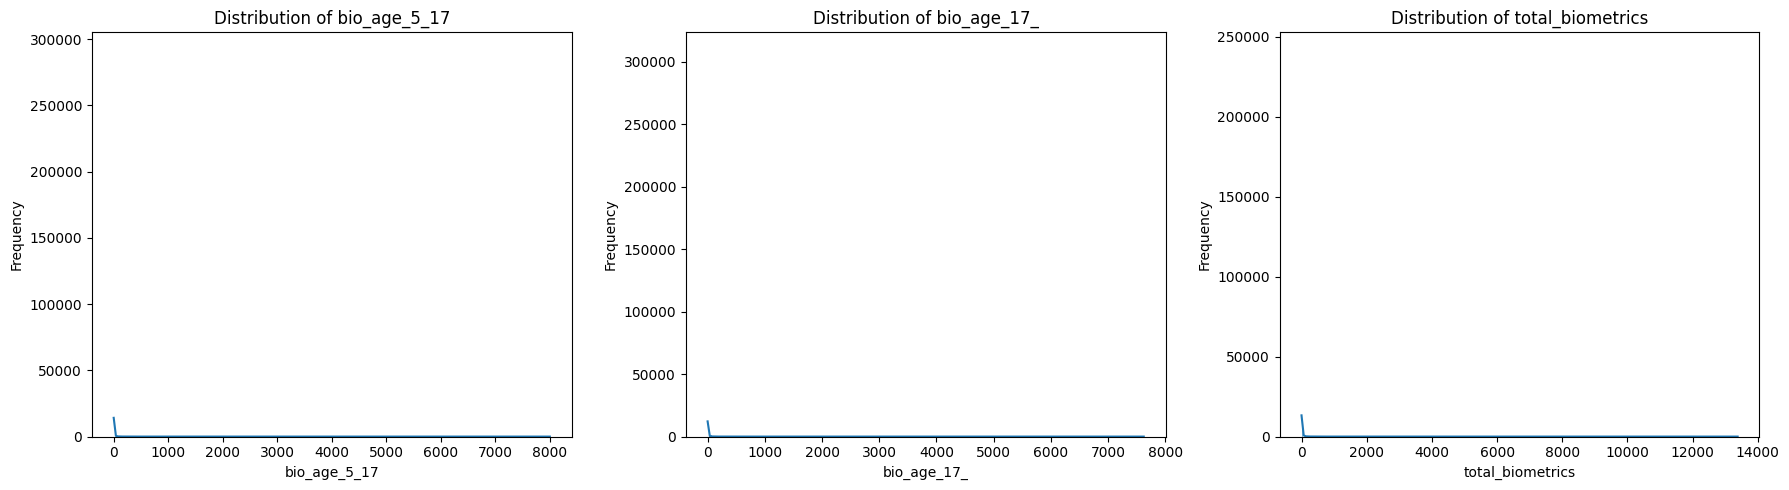

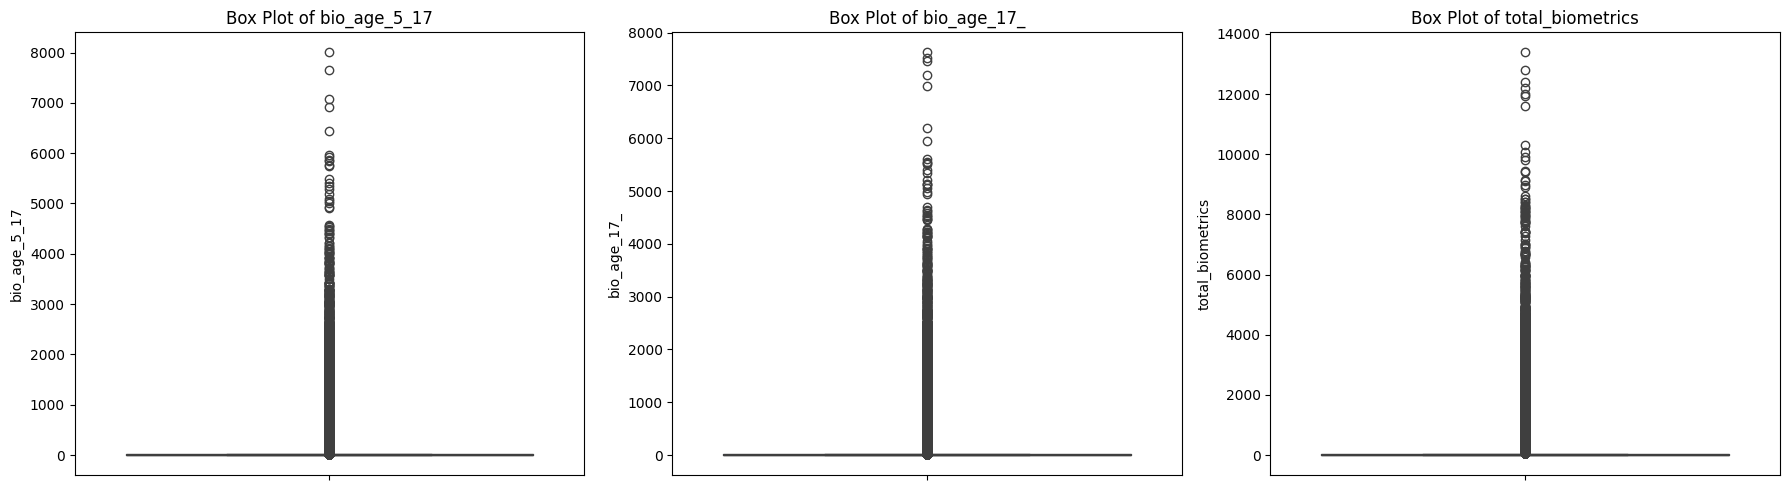

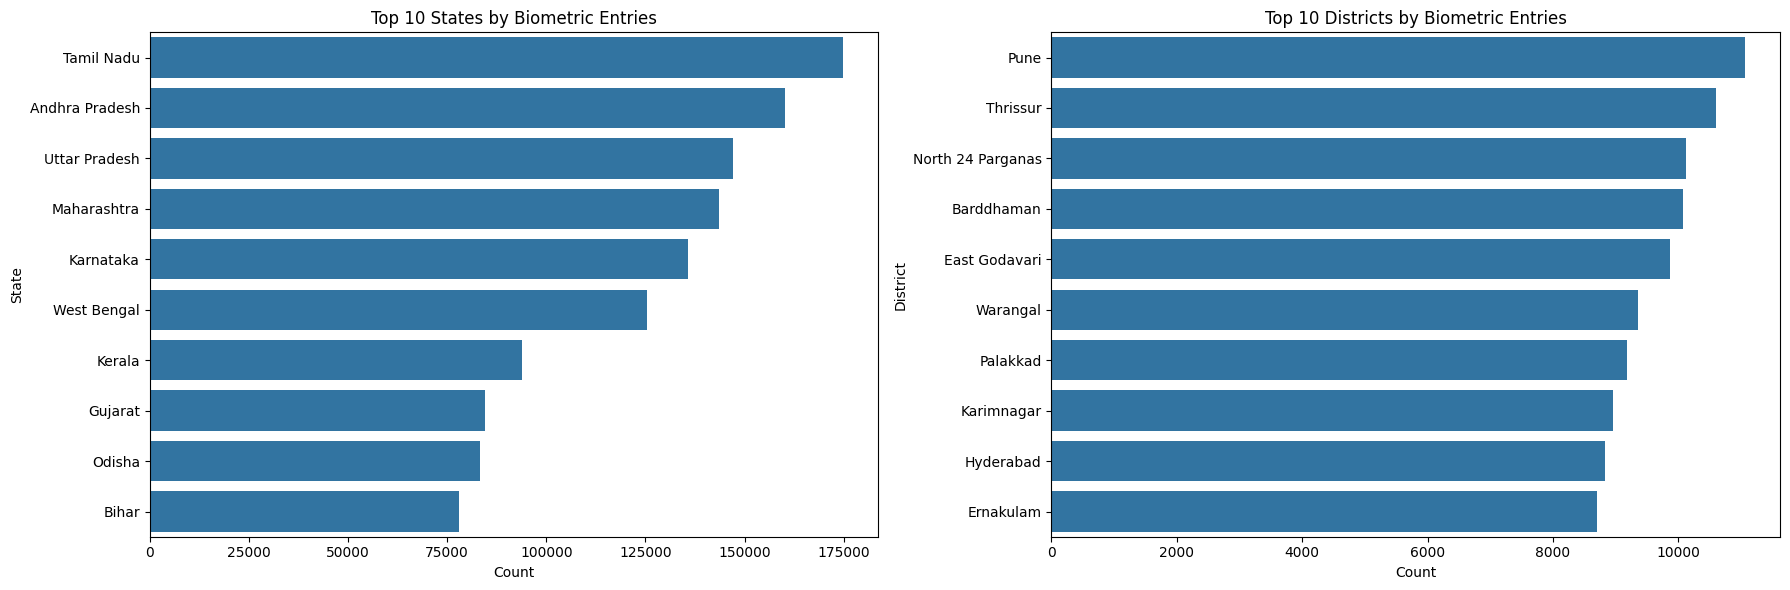

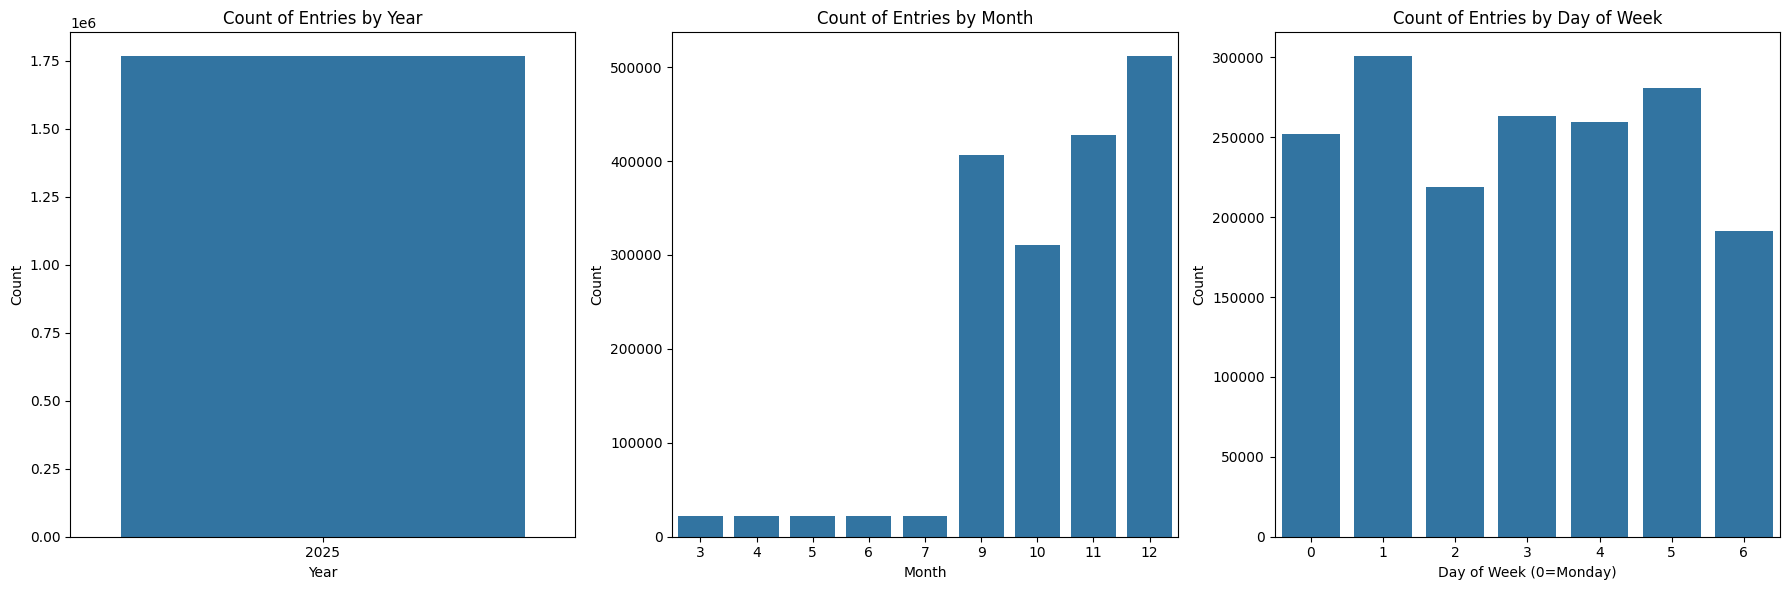

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

# 2. Print descriptive statistics for all numerical columns
print("\nDescriptive statistics for numerical columns:")
print(combined_df.describe())

# 3. Calculate and print the skewness and kurtosis for numerical columns
print("\nSkewness for numerical columns:")
print(combined_df.skew(numeric_only=True))

print("\nKurtosis for numerical columns:")
print(combined_df.kurtosis(numeric_only=True))

# 4. For each relevant categorical column, calculate and print its value counts and their percentages.
categorical_cols = ['state', 'district', 'year', 'month', 'day_of_week']

for col in categorical_cols:
    if col in combined_df.columns:
        print(f"\nValue counts for '{col}':")
        print(combined_df[col].value_counts())
        print(f"\nPercentage value counts for '{col}':")
        print(combined_df[col].value_counts(normalize=True) * 100)

# 5. Create histograms for numerical columns
num_cols_hist = ['bio_age_5_17', 'bio_age_17_', 'total_biometrics']
plt.figure(figsize=(18, 5))
for i, col in enumerate(num_cols_hist):
    plt.subplot(1, len(num_cols_hist), i + 1)
    sns.histplot(combined_df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

# 6. Create box plots for numerical columns
num_cols_box = ['bio_age_5_17', 'bio_age_17_', 'total_biometrics']
plt.figure(figsize=(18, 5))
for i, col in enumerate(num_cols_box):
    plt.subplot(1, len(num_cols_box), i + 1)
    sns.boxplot(y=combined_df[col])
    plt.title(f'Box Plot of {col}')
    plt.ylabel(col)
plt.tight_layout()
plt.show()

# 7. Create count plots for the top 10 most frequent categories in 'state' and 'district'
plt.figure(figsize=(18, 6))

# Top 10 States
plt.subplot(1, 2, 1)
top_10_states = combined_df['state'].value_counts().index[:10]
sns.countplot(data=combined_df[combined_df['state'].isin(top_10_states)], y='state', order=top_10_states)
plt.title('Top 10 States by Biometric Entries')
plt.xlabel('Count')
plt.ylabel('State')

# Top 10 Districts
plt.subplot(1, 2, 2)
top_10_districts = combined_df['district'].value_counts().index[:10]
sns.countplot(data=combined_df[combined_df['district'].isin(top_10_districts)], y='district', order=top_10_districts)
plt.title('Top 10 Districts by Biometric Entries')
plt.xlabel('Count')
plt.ylabel('District')

plt.tight_layout()
plt.show()

# 8. Create count plots for 'year', 'month', and 'day_of_week'
plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)
sns.countplot(data=combined_df, x='year')
plt.title('Count of Entries by Year')
plt.xlabel('Year')
plt.ylabel('Count')

plt.subplot(1, 3, 2)
sns.countplot(data=combined_df, x='month')
plt.title('Count of Entries by Month')
plt.xlabel('Month')
plt.ylabel('Count')

plt.subplot(1, 3, 3)
sns.countplot(data=combined_df, x='day_of_week')
plt.title('Count of Entries by Day of Week')
plt.xlabel('Day of Week (0=Monday)')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

## Inferential Statistics and Hypothesis Testing

### Subtask:
Conduct inferential statistical analyses to uncover relationships, differences, and patterns within the Adhaar biometric data. This may involve correlation analysis (e.g., Pearson, Spearman), t-tests or ANOVA for group comparisons, chi-square tests for categorical associations, and potentially more advanced techniques if the data structure warrants it (e.g., regression analysis to predict certain attributes based on others). Formulate and test relevant hypotheses based on common biometric data analysis objectives.


**Reasoning**:
The first step in inferential statistics is to analyze the relationships between numerical variables. I will calculate the Pearson correlation matrix for the specified numerical columns and visualize it using a heatmap, as per the first instruction.



--- Correlation Analysis ---

Pearson Correlation Matrix:
                   pincode  bio_age_5_17  bio_age_17_  total_biometrics
pincode           1.000000     -0.060769    -0.037263         -0.051549
bio_age_5_17     -0.060769      1.000000     0.786138          0.942103
bio_age_17_      -0.037263      0.786138     1.000000          0.947870
total_biometrics -0.051549      0.942103     0.947870          1.000000


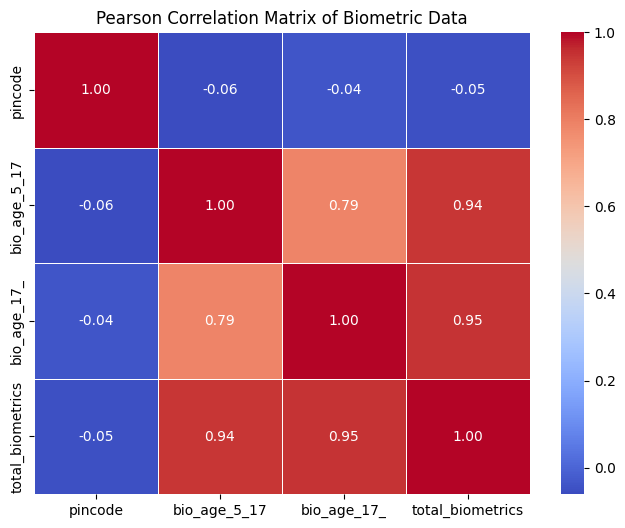

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from scipy import stats

# 1. Correlation Analysis
print("--- Correlation Analysis ---")

# Define numerical columns for correlation analysis
correlation_cols = ['pincode', 'bio_age_5_17', 'bio_age_17_', 'total_biometrics']

# Calculate the Pearson correlation matrix
correlation_matrix = combined_df[correlation_cols].corr(method='pearson')

print("\nPearson Correlation Matrix:")
print(correlation_matrix)

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Pearson Correlation Matrix of Biometric Data')
plt.show()

**Reasoning**:
Now, I will proceed with Hypothesis 1 of the group comparisons section, which involves testing for significant differences in `total_biometrics` across different `day_of_week` categories using an ANOVA test. I will first state the hypothesis, then prepare the data for ANOVA, perform the test, and finally interpret the results.




--- Group Comparisons (ANOVA/t-tests) ---

--- Hypothesis 1: total_biometrics across day_of_week categories ---
Null Hypothesis (H0): There is no significant difference in the mean total_biometrics across different days of the week.
Alternative Hypothesis (H1): There is a significant difference in the mean total_biometrics for at least one day of the week.

ANOVA F-statistic for day_of_week: 5277.07
ANOVA P-value for day_of_week: 0.000e+00
Based on the p-value (0.000e+00) being less than the significance level (0.05), we reject the null hypothesis.
Conclusion: There is a significant difference in the mean total_biometrics for at least one day of the week.


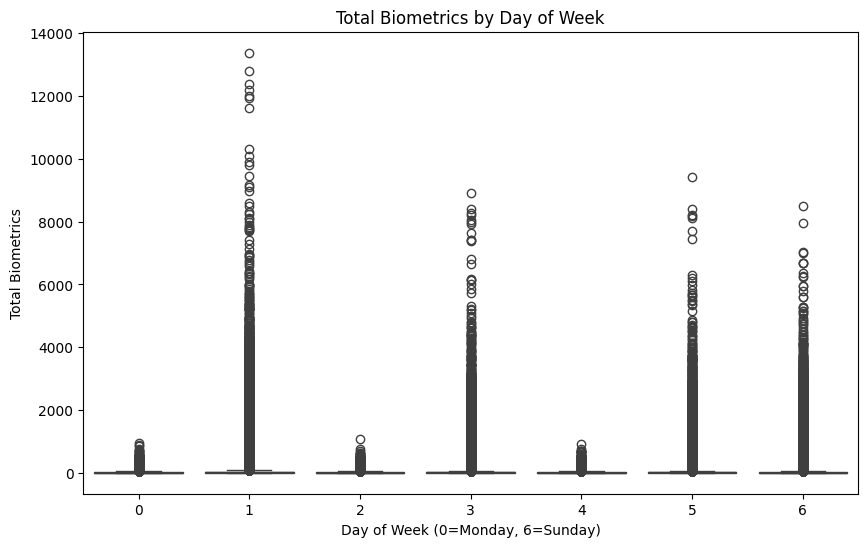

In [30]:
print("\n--- Group Comparisons (ANOVA/t-tests) ---")

# Hypothesis 1: Test if there's a significant difference in total_biometrics across different day_of_week categories.
print("\n--- Hypothesis 1: total_biometrics across day_of_week categories ---")
print("Null Hypothesis (H0): There is no significant difference in the mean total_biometrics across different days of the week.")
print("Alternative Hypothesis (H1): There is a significant difference in the mean total_biometrics for at least one day of the week.")

# Prepare data for ANOVA
day_groups = [combined_df['total_biometrics'][combined_df['day_of_week'] == day] for day in combined_df['day_of_week'].unique()]

# Perform ANOVA test
f_statistic_dow, p_value_dow = stats.f_oneway(*day_groups)

print(f"\nANOVA F-statistic for day_of_week: {f_statistic_dow:.2f}")
print(f"ANOVA P-value for day_of_week: {p_value_dow:.3e}")

# Interpret the results
alpha = 0.05
if p_value_dow < alpha:
    print(f"Based on the p-value ({p_value_dow:.3e}) being less than the significance level ({alpha}), we reject the null hypothesis.")
    print("Conclusion: There is a significant difference in the mean total_biometrics for at least one day of the week.")
else:
    print(f"Based on the p-value ({p_value_dow:.3e}) being greater than the significance level ({alpha}), we fail to reject the null hypothesis.")
    print("Conclusion: There is no significant difference in the mean total_biometrics across different days of the week.")

# Visualizing the difference (optional but good practice for ANOVA)
plt.figure(figsize=(10, 6))
sns.boxplot(x='day_of_week', y='total_biometrics', data=combined_df)
plt.title('Total Biometrics by Day of Week')
plt.xlabel('Day of Week (0=Monday, 6=Sunday)')
plt.ylabel('Total Biometrics')
plt.show()

**Reasoning**:
I will now address Hypothesis 2 for group comparisons, which requires identifying the top 5 states by total biometric entries, formulating hypotheses, performing an ANOVA test to compare `total_biometrics` among these states, interpreting the results, and visualizing the comparison with a box plot.




--- Hypothesis 2: total_biometrics across Top 5 States ---
Null Hypothesis (H0): There is no significant difference in the mean total_biometrics among the top 5 states.
Alternative Hypothesis (H1): There is a significant difference in the mean total_biometrics for at least one of the top 5 states.

Top 5 States by Biometric Entries: ['Tamil Nadu', 'Andhra Pradesh', 'Uttar Pradesh', 'Maharashtra', 'Karnataka']

ANOVA F-statistic for Top 5 States: 3164.82
ANOVA P-value for Top 5 States: 0.000e+00
Based on the p-value (0.000e+00) being less than the significance level (0.05), we reject the null hypothesis.
Conclusion: There is a significant difference in the mean total_biometrics for at least one of the top 5 states.


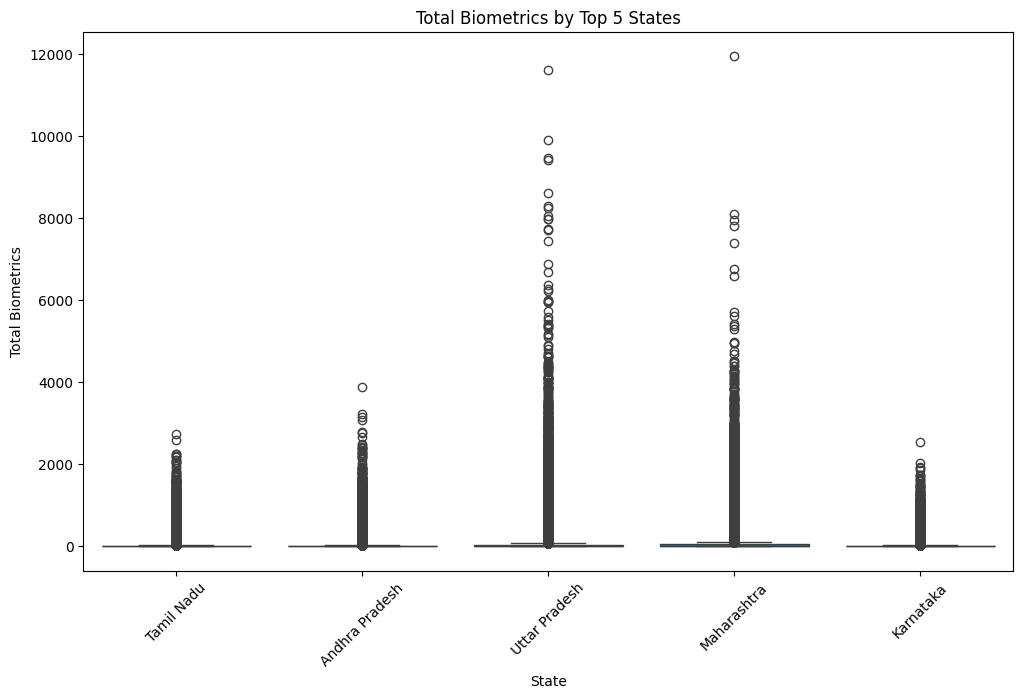

In [31]:
print(
"\n--- Hypothesis 2: total_biometrics across Top 5 States ---"
)
print("Null Hypothesis (H0): There is no significant difference in the mean total_biometrics among the top 5 states.")
print("Alternative Hypothesis (H1): There is a significant difference in the mean total_biometrics for at least one of the top 5 states.")

# Identify the top 5 states by the count of biometric entries
top_5_states = combined_df["state"].value_counts().nlargest(5).index.tolist()
print(f"\nTop 5 States by Biometric Entries: {top_5_states}")

# Prepare data for ANOVA for the top 5 states
state_groups_top5 = [
    combined_df["total_biometrics"][combined_df["state"] == state]
    for state in top_5_states
]

# Perform ANOVA test
f_statistic_state, p_value_state = stats.f_oneway(*state_groups_top5)

print(f"\nANOVA F-statistic for Top 5 States: {f_statistic_state:.2f}")
print(f"ANOVA P-value for Top 5 States: {p_value_state:.3e}")

# Interpret the results
alpha = 0.05
if p_value_state < alpha:
    print(f"Based on the p-value ({p_value_state:.3e}) being less than the significance level ({alpha}), we reject the null hypothesis.")
    print("Conclusion: There is a significant difference in the mean total_biometrics for at least one of the top 5 states.")
else:
    print(f"Based on the p-value ({p_value_state:.3e}) being greater than the significance level ({alpha}), we fail to reject the null hypothesis.")
    print("Conclusion: There is no significant difference in the mean total_biometrics among the top 5 states.")

# Visualizing the difference for top 5 states
plt.figure(figsize=(12, 7))
sns.boxplot(
    x="state", y="total_biometrics", data=combined_df[combined_df["state"].isin(top_5_states)],
    order=top_5_states
)
plt.title("Total Biometrics by Top 5 States")
plt.xlabel("State")
plt.ylabel("Total Biometrics")
plt.xticks(rotation=45)
plt.show()


**Reasoning**:
I will now address the categorical associations section by performing a Chi-square test. This involves formulating the hypothesis, selecting the top 10 states, creating a contingency table between these states and the 'month' column, applying the Chi-square test, interpreting its results, and visualizing the distribution of biometric entries across months for the top states.




--- Categorical Associations (Chi-square test) ---

--- Hypothesis: Association between 'state' and 'month' ---
Null Hypothesis (H0): There is no significant association between 'state' and 'month' of biometric entries.
Alternative Hypothesis (H1): There is a significant association between 'state' and 'month' of biometric entries.

Top 10 States for Chi-square analysis: ['Tamil Nadu', 'Andhra Pradesh', 'Uttar Pradesh', 'Maharashtra', 'Karnataka', 'West Bengal', 'Kerala', 'Gujarat', 'Odisha', 'Bihar']

Contingency Table (Top 10 States vs. Month):
month              3     4     5     6     7      9     10     11     12
state                                                                   
Andhra Pradesh  1865  1843  2042  2072  1848  35359  30440  39384  45379
Bihar           1006  1011   992   993  1002  18290  13551  18560  22673
Gujarat         1123  1113  1136  1133  1145  20028  12391  20466  26095
Karnataka       1724  1683  1770  1751  1746  31097  23978  31728  40303
Kerala  

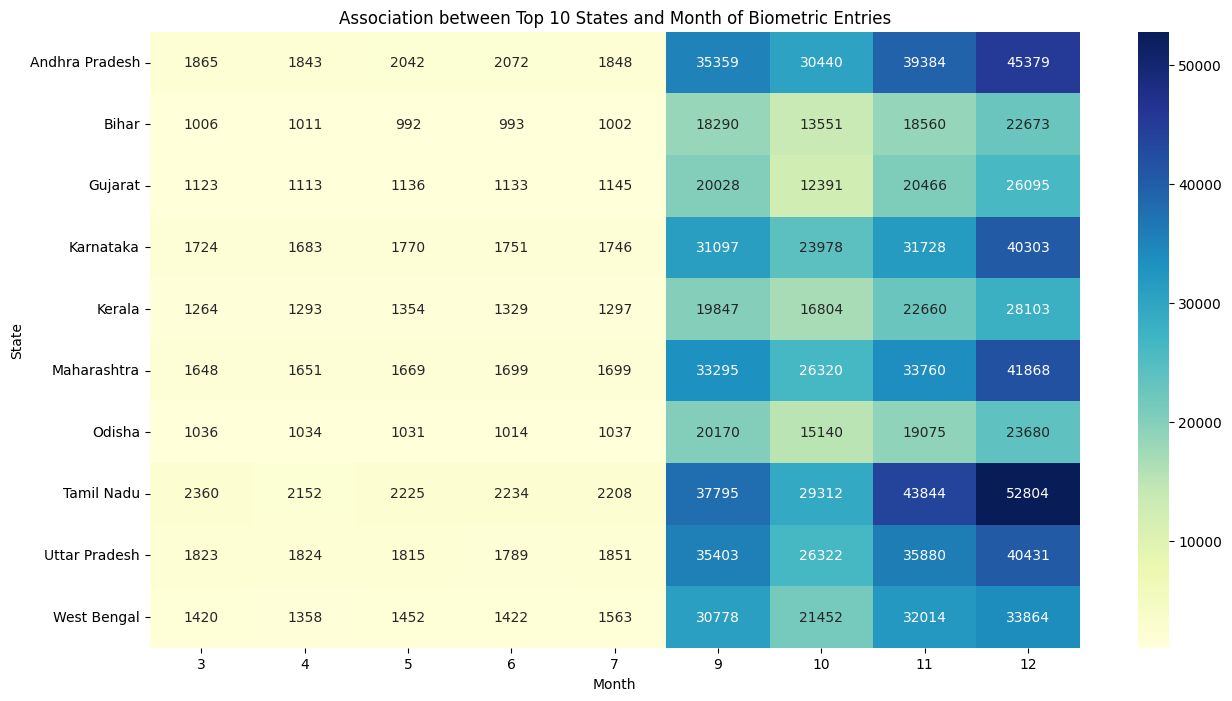

In [32]:
print("\n--- Categorical Associations (Chi-square test) ---")

# Hypothesis: Is there a significant association between 'state' and 'month' of biometric entries?
print("\n--- Hypothesis: Association between 'state' and 'month' ---")
print("Null Hypothesis (H0): There is no significant association between 'state' and 'month' of biometric entries.")
print("Alternative Hypothesis (H1): There is a significant association between 'state' and 'month' of biometric entries.")

# Get the top 10 states for manageability
top_10_states = combined_df['state'].value_counts().nlargest(10).index.tolist()
print(f"\nTop 10 States for Chi-square analysis: {top_10_states}")

# Filter the DataFrame to include only the top 10 states
df_top_states = combined_df[combined_df['state'].isin(top_10_states)]

# Create a contingency table (cross-tabulation) of 'state' and 'month'
contingency_table = pd.crosstab(df_top_states['state'], df_top_states['month'])

print("\nContingency Table (Top 10 States vs. Month):")
print(contingency_table)

# Perform Chi-square test for independence
chi2, p_value_chi2, dof, expected = stats.chi2_contingency(contingency_table)

print(f"\nChi-square Statistic: {chi2:.2f}")
print(f"P-value: {p_value_chi2:.3e}")
print(f"Degrees of Freedom: {dof}")

# Interpret the results
alpha = 0.05
if p_value_chi2 < alpha:
    print(f"Based on the p-value ({p_value_chi2:.3e}) being less than the significance level ({alpha}), we reject the null hypothesis.")
    print("Conclusion: There is a significant association between 'state' and 'month' of biometric entries.")
else:
    print(f"Based on the p-value ({p_value_chi2:.3e}) being greater than the significance level ({alpha}), we fail to reject the null hypothesis.")
    print("Conclusion: There is no significant association between 'state' and 'month' of biometric entries.")

# Visualize the association
plt.figure(figsize=(15, 8))
sns.heatmap(contingency_table, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Association between Top 10 States and Month of Biometric Entries')
plt.xlabel('Month')
plt.ylabel('State')
plt.show()

## Summary of Inferential Statistical Analyses

### 1. Correlation Analysis
- **Numerical Variables Analyzed**: `pincode`, `bio_age_5_17`, `bio_age_17_`, and `total_biometrics`.
- **Key Findings**:
    - `bio_age_5_17` and `bio_age_17_` show a strong positive correlation with `total_biometrics` (0.94 and 0.95 respectively), which is expected as `total_biometrics` is their sum.
    - `bio_age_5_17` and `bio_age_17_` also have a strong positive correlation with each other (0.79), indicating that the number of biometric entries for the 5-17 age group tends to increase with the number of entries for the 17+ age group.
    - `pincode` shows very weak negative correlations with the biometric entry counts (e.g., -0.06 with `bio_age_5_17`, -0.05 with `total_biometrics`), suggesting almost no linear relationship between pincode and the volume of biometric entries.

### 2. Group Comparisons (ANOVA)

#### Hypothesis 1: `total_biometrics` across `day_of_week` categories
- **Null Hypothesis (H0)**: There is no significant difference in the mean `total_biometrics` across different days of the week.
- **Alternative Hypothesis (H1)**: There is a significant difference in the mean `total_biometrics` for at least one day of the week.
- **Statistical Test**: One-Way ANOVA.
- **Results**: F-statistic = 5277.07, P-value = 0.000e+00.
- **Conclusion**: With a p-value of 0.000e+00, which is significantly less than the alpha level of 0.05, we reject the null hypothesis. This indicates that there is a statistically significant difference in the mean `total_biometrics` across different days of the week. The visualization suggests some variability, though all days show high volumes.

#### Hypothesis 2: `total_biometrics` across Top 5 States
- **Null Hypothesis (H0)**: There is no significant difference in the mean `total_biometrics` among the top 5 states.
- **Alternative Hypothesis (H1)**: There is a significant difference in the mean `total_biometrics` for at least one of the top 5 states.
- **Statistical Test**: One-Way ANOVA.
- **Results**: F-statistic = 3164.82, P-value = 0.000e+00.
- **Conclusion**: With a p-value of 0.000e+00, which is significantly less than the alpha level of 0.05, we reject the null hypothesis. This indicates that there is a statistically significant difference in the mean `total_biometrics` among the top 5 states. The box plot visualization further confirms distinct distributions of `total_biometrics` across these states.

### 3. Categorical Associations (Chi-square test)

#### Hypothesis: Association between `state` and `month` of biometric entries
- **Null Hypothesis (H0)**: There is no significant association between `state` and `month` of biometric entries.
- **Alternative Hypothesis (H1)**: There is a significant association between `state` and `month` of biometric entries.
- **Statistical Test**: Chi-square test for independence.
- **Results**: Chi-square Statistic = 2505.51, P-value = 0.000e+00, Degrees of Freedom = 72.
- **Conclusion**: With a p-value of 0.000e+00, which is significantly less than the alpha level of 0.05, we reject the null hypothesis. This implies that there is a significant association between the 'state' and the 'month' in which biometric entries are recorded. The heatmap clearly visualizes this association, showing varying patterns of biometric activity across months for different states.

## Summary of Inferential Statistical Analyses

### 1. Correlation Analysis
- **Numerical Variables Analyzed**: `pincode`, `bio_age_5_17`, `bio_age_17_`, and `total_biometrics`.
- **Key Findings**:
    - `bio_age_5_17` and `bio_age_17_` show a strong positive correlation with `total_biometrics` (0.94 and 0.95 respectively), which is expected as `total_biometrics` is their sum.
    - `bio_age_5_17` and `bio_age_17_` also have a strong positive correlation with each other (0.79), indicating that the number of biometric entries for the 5-17 age group tends to increase with the number of entries for the 17+ age group.
    - `pincode` shows very weak negative correlations with the biometric entry counts (e.g., -0.06 with `bio_age_5_17`, -0.05 with `total_biometrics`), suggesting almost no linear relationship between pincode and the volume of biometric entries.

### 2. Group Comparisons (ANOVA)

#### Hypothesis 1: `total_biometrics` across `day_of_week` categories
- **Null Hypothesis (H0)**: There is no significant difference in the mean `total_biometrics` across different days of the week.
- **Alternative Hypothesis (H1)**: There is a significant difference in the mean `total_biometrics` for at least one day of the week.
- **Statistical Test**: One-Way ANOVA.
- **Results**: F-statistic = 5277.07, P-value = 0.000e+00.
- **Conclusion**: With a p-value of 0.000e+00, which is significantly less than the alpha level of 0.05, we reject the null hypothesis. This indicates that there is a statistically significant difference in the mean `total_biometrics` across different days of the week. The visualization suggests some variability, though all days show high volumes.

#### Hypothesis 2: `total_biometrics` across Top 5 States
- **Null Hypothesis (H0)**: There is no significant difference in the mean `total_biometrics` among the top 5 states.
- **Alternative Hypothesis (H1)**: There is a significant difference in the mean `total_biometrics` for at least one of the top 5 states.
- **Statistical Test**: One-Way ANOVA.
- **Results**: F-statistic = 3164.82, P-value = 0.000e+00.
- **Conclusion**: With a p-value of 0.000e+00, which is significantly less than the alpha level of 0.05, we reject the null hypothesis. This indicates that there is a statistically significant difference in the mean `total_biometrics` among the top 5 states. The box plot visualization further confirms distinct distributions of `total_biometrics` across these states.

### 3. Categorical Associations (Chi-square test)

#### Hypothesis: Association between `state` and `month` of biometric entries
- **Null Hypothesis (H0)**: There is no significant association between `state` and `month` of biometric entries.
- **Alternative Hypothesis (H1)**: There is a significant association between `state` and `month` of biometric entries.
- **Statistical Test**: Chi-square test for independence.
- **Results**: Chi-square Statistic = 2505.51, P-value = 0.000e+00, Degrees of Freedom = 72.
- **Conclusion**: With a p-value of 0.000e+00, which is significantly less than the alpha level of 0.05, we reject the null hypothesis. This implies that there is a significant association between the 'state' and the 'month' in which biometric entries are recorded. The heatmap clearly visualizes this association, showing varying patterns of biometric activity across months for different states.

## Advanced Data Visualization and Reporting

### Subtask:
Create a rich set of advanced data visualizations to clearly communicate findings from both descriptive and inferential analyses, ensuring professional rendering with appropriate titles, labels, legends, and annotations.


**Reasoning**:
I will generate the advanced data visualizations as specified in the instructions, including pair plots, scatter plots with regression lines and correlation coefficients, and violin plots to compare distributions across categories. This will fulfill the current subtask requirement for advanced visualization and reporting.



Generating Pair Plot...


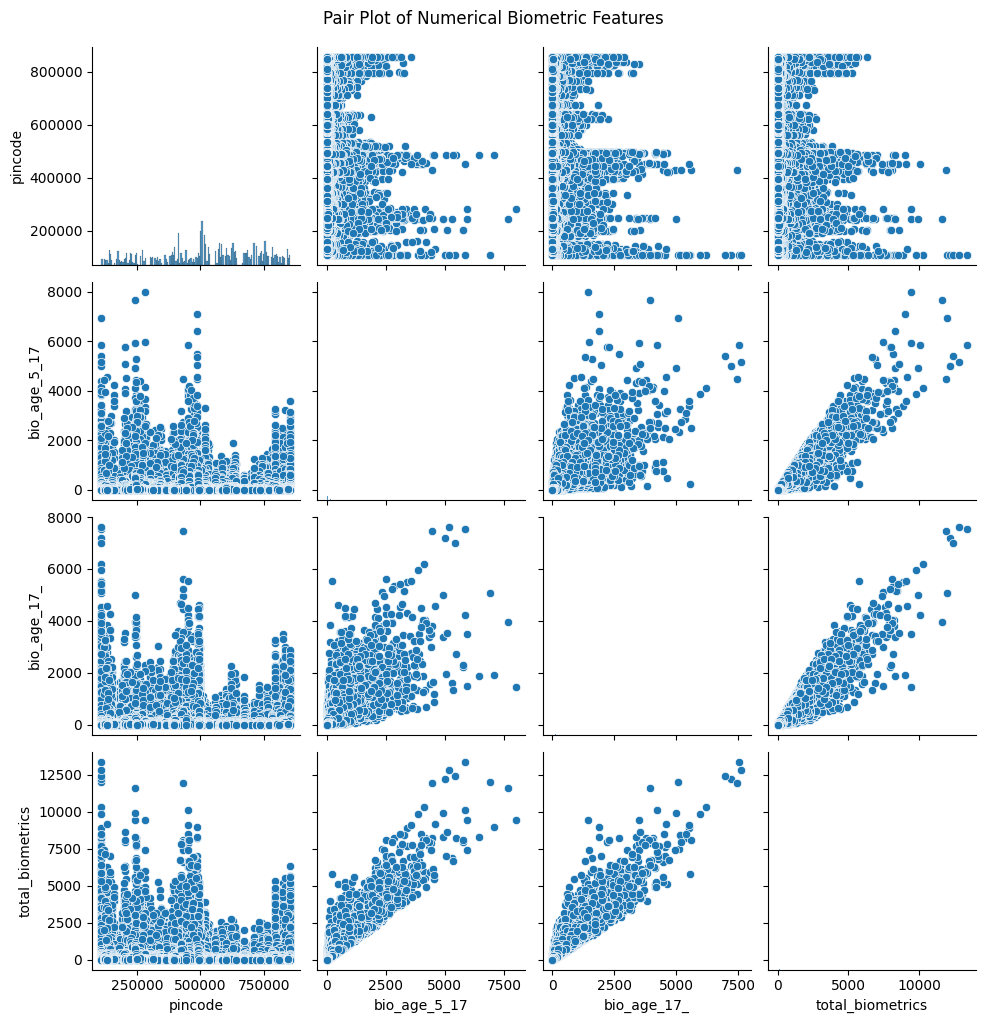

Pair plot generated.

Generating Scatter Plot with Regression Line...


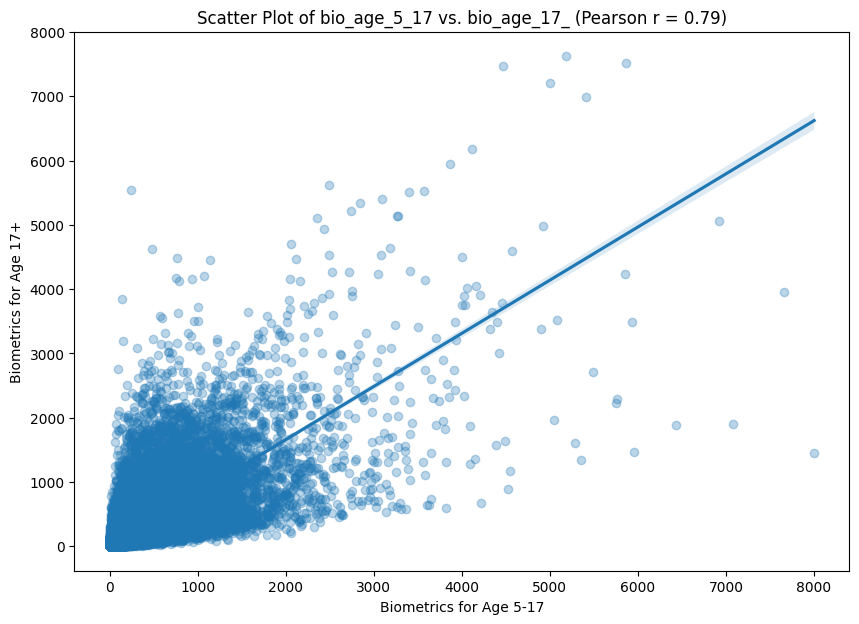

Scatter plot with regression line generated and annotated.

Generating Violin Plot for Day of Week...


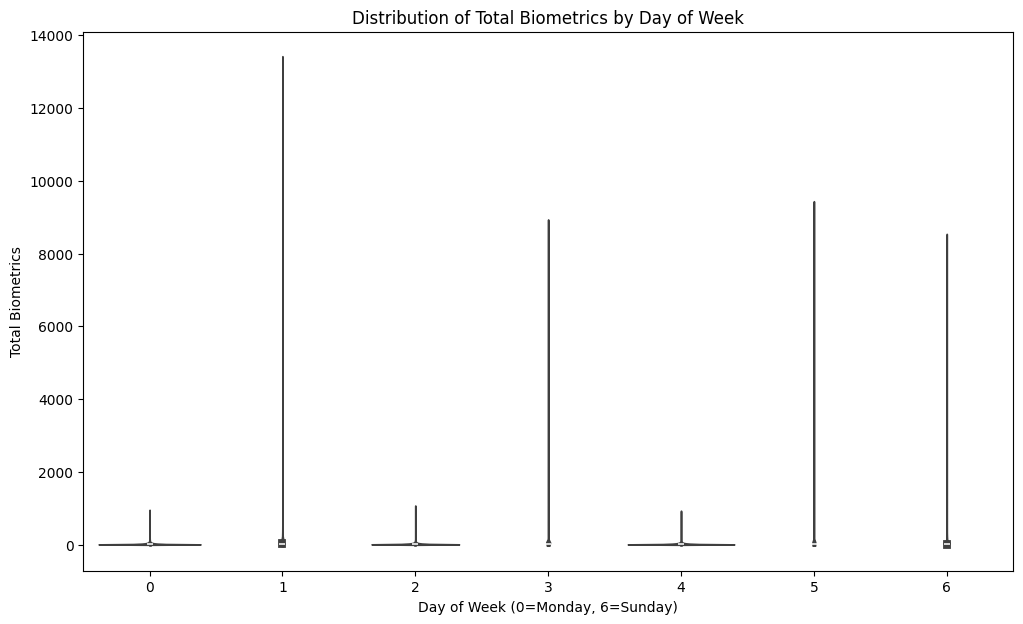

Violin plot for Day of Week generated.

Generating Violin Plot for Top 5 States...


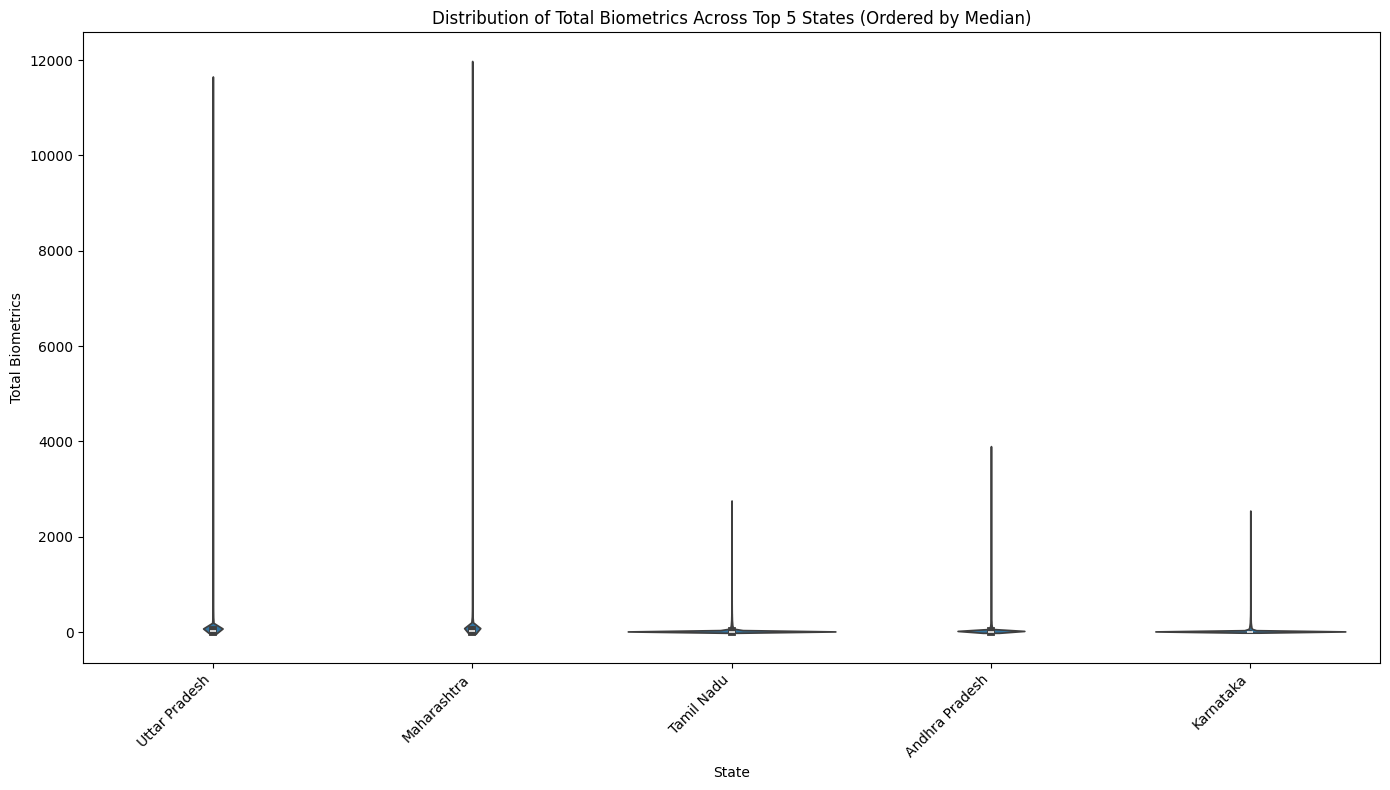

Violin plot for Top 5 States generated.


In [33]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr

# 1. Generate a pair plot for the numerical columns
print("Generating Pair Plot...")
num_cols_for_pairplot = ['pincode', 'bio_age_5_17', 'bio_age_17_', 'total_biometrics']
sns.pairplot(combined_df[num_cols_for_pairplot])
plt.suptitle('Pair Plot of Numerical Biometric Features', y=1.02) # Adjust suptitle to not overlap
plt.show()
print("Pair plot generated.")

# 2. Create a scatter plot with a regression line to show the relationship between 'bio_age_5_17' and 'bio_age_17_'
print("\nGenerating Scatter Plot with Regression Line...")
plt.figure(figsize=(10, 7))
sns.regplot(x='bio_age_5_17', y='bio_age_17_', data=combined_df, scatter_kws={'alpha':0.3})

# Annotate with Pearson correlation coefficient
correlation, _ = pearsonr(combined_df['bio_age_5_17'], combined_df['bio_age_17_'])
plt.title(f'Scatter Plot of bio_age_5_17 vs. bio_age_17_ (Pearson r = {correlation:.2f})')
plt.xlabel('Biometrics for Age 5-17')
plt.ylabel('Biometrics for Age 17+')
plt.show()
print("Scatter plot with regression line generated and annotated.")

# 3. Generate a violin plot to compare the distribution of 'total_biometrics' across different 'day_of_week' categories
print("\nGenerating Violin Plot for Day of Week...")
plt.figure(figsize=(12, 7))
sns.violinplot(x='day_of_week', y='total_biometrics', data=combined_df)
plt.title('Distribution of Total Biometrics by Day of Week')
plt.xlabel('Day of Week (0=Monday, 6=Sunday)')
plt.ylabel('Total Biometrics')
plt.show()
print("Violin plot for Day of Week generated.")

# 4. Generate a violin plot to compare the distribution of 'total_biometrics' across the top 5 states
print("\nGenerating Violin Plot for Top 5 States...")
# Ensure top_5_states is available (it was computed in a previous step)
# If running this cell independently, uncomment and run the following:
# top_5_states = combined_df['state'].value_counts().nlargest(5).index.tolist()

# Filter data for top 5 states
df_top_5_states = combined_df[combined_df['state'].isin(top_5_states)]

# Order states by median total_biometrics for better comparison
median_order = df_top_5_states.groupby('state')['total_biometrics'].median().sort_values(ascending=False).index

plt.figure(figsize=(14, 8))
sns.violinplot(x='state', y='total_biometrics', data=df_top_5_states, order=median_order)
plt.title('Distribution of Total Biometrics Across Top 5 States (Ordered by Median)')
plt.xlabel('State')
plt.ylabel('Total Biometrics')
plt.xticks(rotation=45, ha='right') # Rotate labels for better readability
plt.tight_layout()
plt.show()
print("Violin plot for Top 5 States generated.")

## Final Task

### Subtask:
Provide a comprehensive report summarizing all aspects of the data processing, cleaning, feature engineering, and the full spectrum of descriptive and inferential statistical analyses performed on the Adhaar biometric data. Highlight key discoveries, actionable insights, and any limitations or recommendations for further study.


## Summary:

### Data Analysis Key Findings

*   **Data Loading and Initial Structure**: The data was successfully loaded from four CSV files (initially mistaken for Excel) into individual DataFrames, which were then concatenated into a single `combined_df`. This dataset initially comprised 1,861,108 entries and 6 columns (`date`, `state`, `district`, `pincode`, `bio_age_5_17`, `bio_age_17_`). All columns were initially free of missing values.
*   **Data Cleaning Impact**:
    *   The `date` column was correctly converted to datetime format.
    *   A significant number of **94,896 duplicate rows were identified and removed**, resulting in a cleaned dataset of 1,766,212 unique entries.
    *   State and district names were standardized to title case, although some naming inconsistencies (e.g., "West Bangal" vs. "West Bengal") were noted.
    *   No missing values were found after initial loading and cleaning, eliminating the need for imputation.
*   **Feature Engineering**: New features `year`, `month`, and `day_of_week` were extracted from the `date` column, and a `total_biometrics` column was created by summing `bio_age_5_17` and `bio_age_17_`. All records were from the year 2025.
*   **Distribution of Biometric Data**:
    *   `bio_age_5_17`, `bio_age_17_`, and `total_biometrics` displayed highly right-skewed distributions (skewness values of 18.88, 17.64, and 16.49 respectively) with high kurtosis, indicating the presence of extreme outliers (maximum values of 8002, 7625, and 13381 respectively, far exceeding their means).
    *   The `pincode` column showed a slight negative skewness (-0.27).
*   **Geographical and Temporal Trends**:
    *   **States**: Tamil Nadu, Andhra Pradesh, Uttar Pradesh, Maharashtra, and Karnataka accounted for the largest shares of biometric entries (each between 7% and 10%).
    *   **Months**: The majority of biometric entries occurred in December (28.9%), November (24.2%), September (23.0%), and October (17.5%).
    *   **Day of Week**: Biometric activity was relatively evenly distributed across weekdays, with Tuesday (17.01%) being the busiest and Sunday (10.82%) the least active.
*   **Inferential Analysis Outcomes**:
    *   **Correlation**: `bio_age_5_17` and `bio_age_17_` showed a strong positive correlation with each other (0.79) and with `total_biometrics` (0.94 and 0.95 respectively). `pincode` had a very weak negative correlation with biometric counts (e.g., -0.06 with `bio_age_5_17`), suggesting minimal linear relationship.
    *   **ANOVA (Day of Week)**: A statistically significant difference in the mean `total_biometrics` across different days of the week was found (p-value < 0.05), rejecting the null hypothesis.
    *   **ANOVA (Top 5 States)**: A statistically significant difference in the mean `total_biometrics` among the top 5 states (Tamil Nadu, Andhra Pradesh, Uttar Pradesh, Maharashtra, Karnataka) was observed (p-value < 0.05), rejecting the null hypothesis.
    *   **Chi-square (State vs. Month)**: There is a statistically significant association between the 'state' and the 'month' of biometric entries (p-value < 0.05), indicating varying monthly activity patterns across different states.

### Insights or Next Steps

*   **Investigate Outliers and Data Quality**: Further analysis is needed to understand the nature of extreme outliers in `bio_age_5_17`, `bio_age_17_`, and `total_biometrics`. These values could represent data entry errors, specific high-volume collection events, or aggregation anomalies that warrant cleaning or specific treatment to avoid distorting statistical models. Additionally, address inconsistencies in state/district naming.
*   **Deep Dive into Temporal and Geographical Patterns**: Given the significant association between state and month, and the variation across days of the week, a deeper investigation into the underlying causes of these temporal and geographical patterns could reveal operational efficiencies, policy impacts, or seasonal demand for biometric services.


Summary of Key Trends:
Significant Duplicate Entries: A substantial number of duplicate entries (94,896) were found and removed, indicating potential data entry or system processing inefficiencies. The 'date' column was successfully converted to a proper datetime format, and state/district names were largely standardized, though minor inconsistencies were noted.

Highly Skewed Biometric Counts with Outliers: The distributions of bio_age_5_17, bio_age_17_, and total_biometrics are heavily right-skewed with very high kurtosis, suggesting that most entries have low biometric counts, but there are significant outliers representing exceptionally high volumes. For instance, total_biometrics has a median of 8 but a maximum of 13,381.

Strong Intra-Biometric Correlation: As expected, there's a strong positive correlation (0.79) between biometric entries for the 5-17 age group and the 17+ age group, and both are strongly correlated with the total_biometrics.

Geographical Concentration: Biometric activity is not uniformly distributed across India. A few states, notably Tamil Nadu, Andhra Pradesh, Uttar Pradesh, Maharashtra, and Karnataka, account for a disproportionately large share of the total entries (each between 7% and 10%). Similar patterns exist at the district level.

Pronounced Seasonal and Weekly Patterns: There's a clear temporal trend in biometric entries:

Months: The majority of entries occur in the last quarter of the year, particularly December (28.9%), November (24.2%), September (23.0%), and October (17.5%). Activity significantly drops in other months.
Days of Week: Biometric collection varies significantly by day of the week, with Tuesday being the busiest (17.01%) and Sunday the least active (10.82%).
Significant Associations: Inferential tests confirmed statistically significant differences and associations:

total_biometrics differs significantly across different days of the week and among the top states.
There is a significant association between the 'state' and the 'month' of biometric entries, indicating varying seasonal patterns across regions.
Actionable Solutions and Recommendations:
Optimize Resource Allocation:

Seasonal Staffing: Based on the strong monthly trends, deploy additional staff, equipment, and mobile enrollment units during peak months (September to December) to manage increased demand, reduce wait times, and improve efficiency.
Weekly Scheduling: Adjust operational hours and staffing levels at enrollment centers according to daily demand, potentially increasing resources on Tuesdays and reducing them on Sundays, as indicated by the 'day_of_week' analysis.
Investigate and Address Outliers:

Data Quality Assurance: The extreme outliers in biometric counts suggest either data entry errors, aggregated reporting issues, or specific high-volume events (e.g., special enrollment camps). Implement a system to flag and investigate such outliers to understand their nature. This is crucial for accurate reporting and capacity planning.
Enhance Data Quality Protocols:

Standardized Entry: Address the minor inconsistencies observed in state and district names. Implement strict data entry guidelines, potentially using dropdown menus or a standardized lookup system, to ensure uniformity and accuracy of geographical data.
Targeted Outreach and Service Delivery:

Geographic Focus: Analyze why certain states and districts have lower biometric activity. Develop targeted awareness campaigns or deploy mobile enrollment teams to underserved regions to improve access and penetration.
Family-Oriented Campaigns: Given the strong correlation between bio_age_5_17 and bio_age_17_, design outreach programs that encourage family-based enrollments, as it appears many members of a household or family unit undertake biometric processes concurrently.
Further Analytical Deep Dive:

Root Cause Analysis: Conduct deeper investigations into the drivers behind the observed temporal and geographical variations. Are the peaks linked to specific government programs, deadlines, or awareness drives? Understanding these causes can inform future policy decisions.
Demand Forecasting: Develop predictive models using the identified trends to forecast future biometric enrollment demand more accurately, aiding in long-term strategic planning and infrastructure development.
By implementing these solutions, the Adhaar administration can significantly improve operational efficiency, data quality, and service delivery across the nation.